In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import seaborn as sns
import glob 
import sys
import os
import torch

%matplotlib inline
sns.set(style="whitegrid")

### Food101 - VGG11

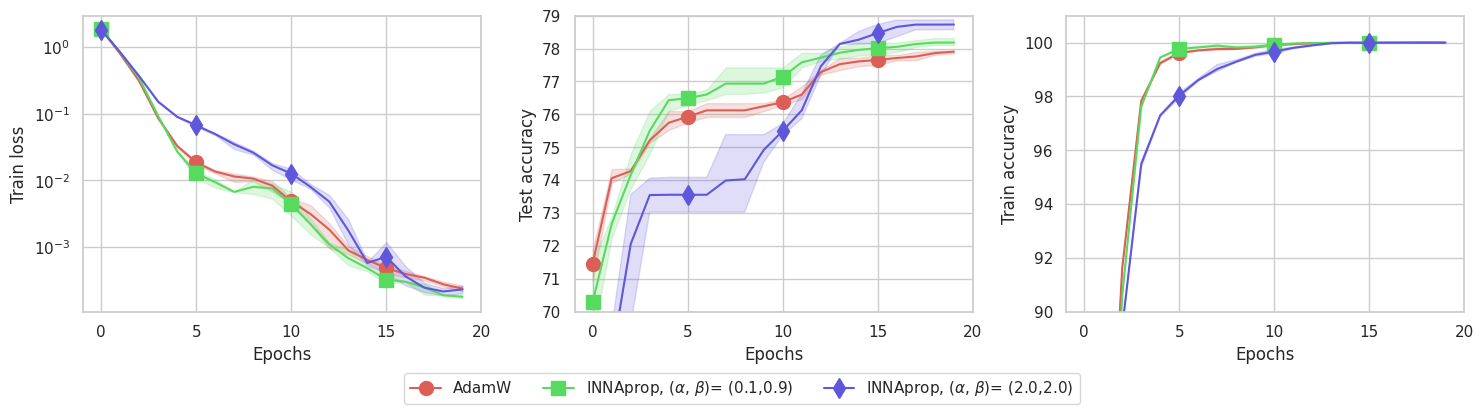

In [3]:
path = 'finetune/food101/vgg11'
all_files = glob.glob(path + '/*/*.csv')

# Concatenating all CSV files into a single DataFrame
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

selected_values = ['AdamW',
                    'INNAprop, ($\\alpha$, $\\beta$)= (0.1,0.9)',
                   'INNAprop, ($\\alpha$, $\\beta$)= (2.0,2.0)'
                  ]

mask = df['optimizer'].isin(selected_values)
df = df[mask]
# Define custom palette and markers
palette = sns.color_palette("hls", len(selected_values))
markers = {'AdamW': 'o', 
           'INNAprop, ($\\alpha$, $\\beta$)= (0.1,0.9)': 's',
           'INNAprop, ($\\alpha$, $\\beta$)= (2.0,2.0)': 'd'
          }

# Setting up the figure with subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 4), sharex=True)

# Specific settings for each metric
metric_settings = {
    'train_loss': {'yscale': 'log', 'ylim': None},
    'test_accuracy': {'yscale': None, 'ylim': (70, 79)},
    'train_accuracy': {'yscale': None, 'ylim': (90, 101)}
}

marker_size = 10  # Smaller value for smaller markers

# Adjustments for the plotting
for metric, axis in zip(metric_settings.keys(), ax):
    for optimizer in selected_values:
        subset = df[df['optimizer'] == optimizer]
        subset2 = df[df['optimizer'] == optimizer].groupby(['optimizer', 'epoch']).mean().reset_index()

        
        # Line plot for the smooth line
        sns.lineplot(data=subset, x='epoch', y=metric, hue='optimizer', style='optimizer',
                     dashes=False, errorbar=('ci',95), estimator='mean', palette=[palette[selected_values.index(optimizer)]], legend=False,
                      ax=axis)
        
        marker_subset = subset2[subset2['epoch'] % 5 == 0]
        for _, row in marker_subset.iterrows():
            axis.plot(row['epoch'], row[metric], markers[optimizer], color=palette[selected_values.index(optimizer)], markersize=marker_size)

    if metric_settings[metric]['yscale']:
        axis.set_yscale(metric_settings[metric]['yscale'])
    if metric_settings[metric]['ylim']:
        axis.set_ylim(metric_settings[metric]['ylim'])
    # Apply yscale and ylim settings
    if metric_settings[metric]['yscale']:
        axis.set_yscale(metric_settings[metric]['yscale'])
    if metric_settings[metric]['ylim']:
        axis.set_ylim(metric_settings[metric]['ylim'])

    axis.set_xlabel('Epochs')
    axis.set_ylabel(metric.replace('_', ' ').capitalize())

# Adjust x-axis to explicitly display epochs from 0 to 20
for axis in ax:
    axis.set_xticks(range(0, 21, 5))
    axis.set_xticklabels(range(0, 21, 5))

# Custom legend for the optimizers
legend_handles = [mlines.Line2D([], [], color=palette[i], marker=markers[name], markersize=10, label=name) 
                  for i, name in enumerate(selected_values)]
fig.legend(handles=legend_handles, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3)

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.savefig('finetune_vgg11_food101.pdf', bbox_inches='tight')
plt.show()

### Food101 - ResNet18

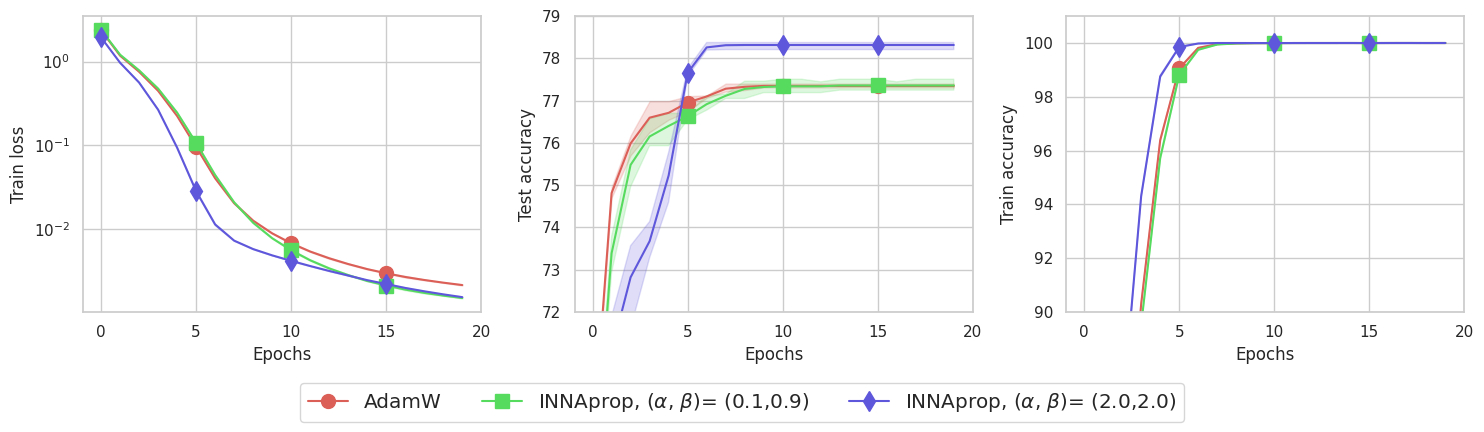

In [4]:
path = 'finetune/food101/resnet18'
all_files = glob.glob(path + '/*/*.csv')

# Concatenating all CSV files into a single DataFrame
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

# Select specific optimizer values for comparison
selected_values = ['AdamW',
                    'INNAprop, ($\\alpha$, $\\beta$)= (0.1,0.9)',
                   'INNAprop, ($\\alpha$, $\\beta$)= (2.0,2.0)'
                  ]

mask = df['optimizer'].isin(selected_values)
df = df[mask]
# Define custom palette and markers
palette = sns.color_palette("hls", len(selected_values))
markers = {'AdamW': 'o', 
           'INNAprop, ($\\alpha$, $\\beta$)= (0.1,0.9)': 's',
           'INNAprop, ($\\alpha$, $\\beta$)= (2.0,2.0)': 'd'
          }

# Setting up the figure with subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 4), sharex=True)

# Specific settings for each metric
metric_settings = {
    'train_loss': {'yscale': 'log', 'ylim': None},
    'test_accuracy': {'yscale': None, 'ylim': (72, 79)},
    'train_accuracy': {'yscale': None, 'ylim': (90, 101)}
}

# Adjustments for the plotting
for metric, axis in zip(metric_settings.keys(), ax):
    for optimizer in selected_values:
        subset = df[df['optimizer'] == optimizer]
        subset2 = df[df['optimizer'] == optimizer].groupby(['optimizer', 'epoch']).mean().reset_index()

        
        # Line plot for the smooth line
        sns.lineplot(data=subset, x='epoch', y=metric, hue='optimizer', style='optimizer',
                     dashes=False, errorbar=('ci',95), estimator='mean', palette=[palette[selected_values.index(optimizer)]], legend=False,
                      ax=axis)
        
        marker_subset = subset2[subset2['epoch'] % 5 == 0]
        for _, row in marker_subset.iterrows():
            axis.plot(row['epoch'], row[metric], markers[optimizer], color=palette[selected_values.index(optimizer)], markersize=marker_size)

    if metric_settings[metric]['yscale']:
        axis.set_yscale(metric_settings[metric]['yscale'])
    if metric_settings[metric]['ylim']:
        axis.set_ylim(metric_settings[metric]['ylim'])
    # Apply yscale and ylim settings
    if metric_settings[metric]['yscale']:
        axis.set_yscale(metric_settings[metric]['yscale'])
    if metric_settings[metric]['ylim']:
        axis.set_ylim(metric_settings[metric]['ylim'])

    axis.set_xlabel('Epochs')
    axis.set_ylabel(metric.replace('_', ' ').capitalize())

# Adjust x-axis to explicitly display epochs from 0 to 20
for axis in ax:
    axis.set_xticks(range(0, 21, 5))
    axis.set_xticklabels(range(0, 21, 5))

# Custom legend for the optimizers
legend_handles = [mlines.Line2D([], [], color=palette[i], marker=markers[name], markersize=10, label=name) 
                  for i, name in enumerate(selected_values)]
fig.legend(handles=legend_handles, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=len(selected_values), fontsize='large')

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.savefig('finetune_resnet18_food101.pdf', bbox_inches='tight')
plt.show()